Project 2

In [31]:
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import requests

In [82]:
GPU_ENDPOINT = 'https://store.steampowered.com/hwsurvey/videocard/'
response = requests.get(GPU_ENDPOINT)
soup = BeautifulSoup(response.content,'html.parser')

In [112]:
column_names = ["Name", "May", "Jun", "Jul", "Aug", "Sep"]
df = pd.DataFrame(columns=column_names)

all_gpu_div = soup.select(".substats_col_left.col_header")[1]

for item in all_gpu_div.next_elements:
    if item.name == "span" and "%" not in item.get_text():
        text = item.get_text()
        df = df.append({"Name": text}, ignore_index=True)
    elif item.name == "div":
        if item.get_text() == "Other":
            break

def populate_col(elements, offset, month):
    if offset == 4:
        stagger = 1
        begin=1
        shift=1
    else:
        stagger = 4
        begin=offset
        shift=4
    for n in range(begin, len(df)*stagger+4, stagger):
        try:
            num = float(elements[n].get_text().removesuffix("%"))
        except:
            num = 0.00
        df[f"{month}"][int(((n-shift))/stagger)] = num

In [ ]:
all_percentages = all_gpu_div.find_all_next(class_="substats_col_month")
last_month_percentages = all_gpu_div.find_all_next(class_="substats_col_month_last_pct")
for n in range(0,4):
    populate_col(all_percentages, n, column_names[n+1])
populate_col(last_month_percentages, 4, column_names[5])
print(df)

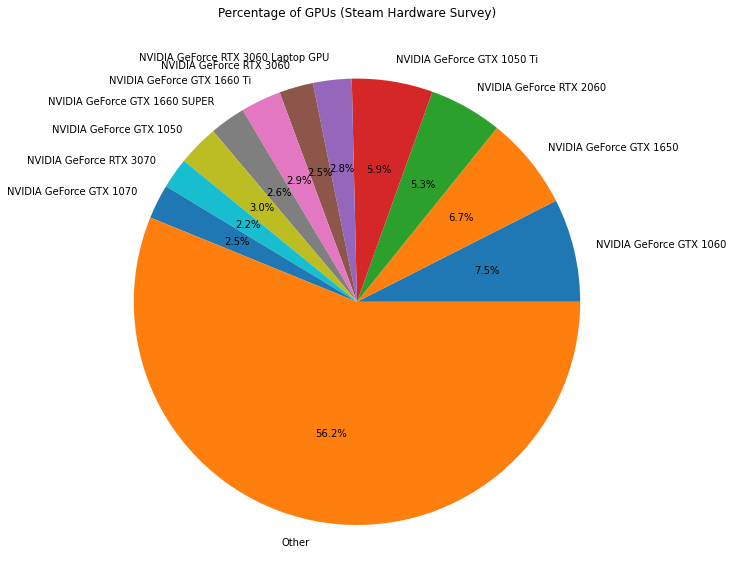

In [147]:
pie_df = df[df.May > 2]
pie_df = pie_df.append({"Name":"Other","May": 100-sum(df[df.May<2].May)}, ignore_index=True)
fig1, ax1 = plt.subplots()
ax1.pie(pie_df.May, labels=pie_df.Name, autopct='%.1f%%')
ax1.set_title("Percentage of GPUs (Steam Hardware Survey)")
fig1.set_facecolor('white')
fig1.set_size_inches(10,12)
plt.show()

In [166]:
sorted_df = df.sort_values(by="May")
top_10_df = df[0:9].set_index().T
reset_index

,index,0,1,2,3,4,5,6,7,8
0,Name,NVIDIA GeForce GTX 1060,NVIDIA GeForce GTX 1650,NVIDIA GeForce RTX 2060,NVIDIA GeForce GTX 1050 Ti,NVIDIA GeForce RTX 3060 Laptop GPU,NVIDIA GeForce RTX 3060,NVIDIA GeForce GTX 1660 Ti,NVIDIA GeForce GTX 1660 SUPER,NVIDIA GeForce GTX 1050
1,May,7.17,6.45,5.08,5.62,2.68,2.36,2.81,2.48,2.85
2,Jun,7.02,6.51,5.03,5.36,2.99,2.62,2.66,2.42,2.81
3,Jul,7.12,6.35,5.1,5.67,3.34,2.58,2.79,2.47,2.83
4,Aug,6.6,6.24,5.02,4.99,3.39,3.24,2.55,2.46,2.57
5,Sep,6.94,6.32,5.19,4.91,4.0,3.52,2.57,2.52,2.45


In [167]:
plt.plot(column_names[1:], top_10_df["NVIDIA GeForce GTX 1060"] )

KeyError: 'NVIDIA GeForce GTX 1060'